# CCE-312 Mid Question Solution of 16th Batch

1. A total of 8,500 taka was invested in three interest earning accounts. The interest rates were 2%, 3% and 6% if the total simple interest for one year was 380taka and the amount invested at 6% was equal to the sum of the amounts in the other two accounts, then how much was invested in each account? (use Cramer's rule). Cramer's Rule with python code.

In [1]:
import numpy as np

# Coefficient matrix
A = np.array([[1, 1, 1],
        [0.02, 0.03, 0.06],
        [1, 1, -1]])

# Constants matrix
B = np.array([8500, 380, 0])

# Function to calculate the determinant of a matrix
def determinant(matrix):
  return np.linalg.det(matrix)

# Function to solve the system using Cramer's rule
def cramers_rule(A, B):
  det_A = determinant(A)
  if det_A == 0:
    raise ValueError("The system has no unique solution.")
  
  solutions = []
  for i in range(len(B)):
    Ai = np.copy(A)
    Ai[:, i] = B
    solutions.append(determinant(Ai) / det_A)
  
  return solutions

# Solve the system
solution = cramers_rule(A, B)
x, y, z = solution
print(f"Amount invested at 2%: {x} taka")
print(f"Amount invested at 3%: {y} taka")
print(f"Amount invested at 6%: {z} taka")

Amount invested at 2%: 249.99999999999702 taka
Amount invested at 3%: 4000.000000000007 taka
Amount invested at 6%: 4250.000000000002 taka


2. Use the Gauss-Jordan technique to solve the same system as in \
3x<sub>1</sub> - 0.1x<sub>2</sub> - 0.2x<sub>3</sub> = 7.85 \
0.1x<sub>1</sub> + 7x<sub>2</sub> - 0.3x<sub>3</sub> = -19.3 \
0.3x<sub>1</sub> - 0.2x<sub>2</sub> + 10x<sub>3</sub> = 71.4

In [1]:
import numpy as np

# Coefficient matrix
A2 = np.array([[3, -0.1, -0.2],
         [0.1, 7, -0.3],
         [0.3, -0.2, 10]])

# Constants matrix
B2 = np.array([7.85, -19.3, 71.4])

# Augmented matrix
augmented_matrix2 = np.hstack((A2, B2.reshape(-1, 1)))

# Function to perform Gauss-Jordan elimination
def gauss_jordan(matrix):
  rows, cols = matrix.shape
  for i in range(rows):
    # Make the diagonal contain all 1's
    matrix[i] = matrix[i] / matrix[i, i]
    for j in range(rows):
      if i != j:
        matrix[j] = matrix[j] - matrix[j, i] * matrix[i]
  
  return matrix[:, -1]

# Perform Gauss-Jordan elimination
solution2 = gauss_jordan(augmented_matrix2.copy())

# Extract the solutions
x1, x2, x3 = solution2
print(f"Solution using Gauss-Jordan elimination:")
print(f"x1: {x1}")
print(f"x2: {x2}")
print(f"x3: {x3}")

Solution using Gauss-Jordan elimination:
x1: 3.0
x2: -2.5
x3: 7.000000000000002


3. Use Gauss elimination to solve: \
8x<sub>1</sub> + 2x<sub>2</sub> - 2x<sub>3</sub> = 8 \
10x<sub>1</sub> + 2x<sub>2</sub> + 4x<sub>3</sub> = 16 \
12x<sub>1</sub> + 2x<sub>2</sub> + 2x<sub>3</sub> = 16 \
Employ partial pivoting, and check your answers by substituting them into the original equations.

In [3]:
import numpy as np

# Coefficient matrix
A3 = np.array([[8, 2, -2],
         [10, 2, 4],
         [12, 2, 2]])

# Constants matrix
B3 = np.array([8, 16, 16])

# Augmented matrix
augmented_matrix3 = np.hstack((A3, B3.reshape(-1, 1)))

# Function to perform Gauss elimination with partial pivoting
def gauss_elimination_with_pivoting(matrix):
  rows, cols = matrix.shape
  for i in range(rows):
    # Partial pivoting
    max_row = np.argmax(np.abs(matrix[i:, i])) + i
    if i != max_row:
      matrix[[i, max_row]] = matrix[[max_row, i]]
    
    # Make the diagonal contain all 1's
    matrix[i] = matrix[i] / matrix[i, i]
    for j in range(i + 1, rows):
      matrix[j] = matrix[j] - matrix[j, i] * matrix[i]
  
  # Back substitution
  x = np.zeros(rows)
  for i in range(rows - 1, -1, -1):
    x[i] = matrix[i, -1] - np.sum(matrix[i, i + 1:rows] * x[i + 1:rows])
  
  return x

# Perform Gauss elimination with partial pivoting
solution3 = gauss_elimination_with_pivoting(augmented_matrix3.copy())

# Extract the solutions
x3, y3, z3 = solution3
print(f"Solution using Gauss elimination with partial pivoting:")
print(f"x: {x3}")
print(f"y: {y3}")
print(f"z: {z3}")

# Check the solution by substituting back into the original equations
check1 = 8 * x3 + 2 * y3 - 2 * z3
check2 = 10 * x3 + 2 * y3 + 4 * z3
check3 = 12 * x3 + 2 * y3 + 2 * z3

print(f"Check 1: {check1} (should be 8)")
print(f"Check 2: {check2} (should be 16)")
print(f"Check 3: {check3} (should be 16)")

Solution using Gauss elimination with partial pivoting:
x: 1.0
y: 1.0
z: 1.0
Check 1: 8.0 (should be 8)
Check 2: 16.0 (should be 16)
Check 3: 16.0 (should be 16)


4. Three masses are suspended vertically by a series of identical springs where mass 1 is at the top and mass 3 is at the bottom. <br><br> If g = 9.81 m/s², m1 = 2 kg, m2 = 3 kg, m3 = 2.5 kg, and the k's = 10 kg/s , solve for the displacements x.

In [1]:
import numpy as np

# Given values
g = 9.81  # acceleration due to gravity in m/s^2
m1 = 2.0  # mass 1 in kg
m2 = 3.0  # mass 2 in kg
m3 = 2.5  # mass 3 in kg
k = 10.0  # spring constant in kg/s

# Coefficient matrix
A4 = np.array([[k, -k, 0],
         [-k, 2*k, -k],
         [0, -k, k]])

# Constants matrix
B4 = np.array([m1 * g, m2 * g, m3 * g])

# Augmented matrix
augmented_matrix4 = np.hstack((A4, B4.reshape(-1, 1)))

# Function to perform Gaussian elimination
def gaussian_elimination(matrix):
  rows, cols = matrix.shape
  for i in range(rows):
    # Make the diagonal contain all 1's
    matrix[i] = matrix[i] / matrix[i, i]
    for j in range(i + 1, rows):
      matrix[j] = matrix[j] - matrix[j, i] * matrix[i]

  # Back substitution
  x = np.zeros(rows)
  for i in range(rows - 1, -1, -1):
    x[i] = matrix[i, -1] - np.sum(matrix[i, i + 1:rows] * x[i + 1:rows])

  return x

# Perform Gaussian elimination
solution4 = gaussian_elimination(augmented_matrix4.copy())

# Extract the solutions
x1, x2, x3 = solution4
print(f"Displacements:")
print(f"x1: {x1} m")
print(f"x2: {x2} m")
print(f"x3: {x3} m")

Displacements:
x1: nan m
x2: inf m
x3: inf m


C:\Users\Jaad\AppData\Local\Temp\ipykernel_14872\996881803.py:26: RuntimeWarning: divide by zero encountered in divide
  matrix[i] = matrix[i] / matrix[i, i]
C:\Users\Jaad\AppData\Local\Temp\ipykernel_14872\996881803.py:26: RuntimeWarning: invalid value encountered in divide
  matrix[i] = matrix[i] / matrix[i, i]
C:\Users\Jaad\AppData\Local\Temp\ipykernel_14872\996881803.py:33: RuntimeWarning: invalid value encountered in multiply
  x[i] = matrix[i, -1] - np.sum(matrix[i, i + 1:rows] * x[i + 1:rows])


5. Solve the following systems of linear equations by Gaussian elimination method <br> 2x - 2y + 3z = 2, <br> x + 2y - z = 3, <br > 3x - y + 2z = 1



In [4]:
import numpy as np

# Coefficient matrix
A5 = np.array([[2, -2, 3],
         [1, 2, -1],
         [3, -1, 2]])

# Constants matrix
B5 = np.array([2, 3, 1])

# Augmented matrix
augmented_matrix5 = np.hstack((A5, B5.reshape(-1, 1)))

# Function to perform Gaussian elimination
def gaussian_elimination(matrix):
  rows, cols = matrix.shape
  for i in range(rows):
    # Make the diagonal contain all 1's
    matrix[i] = matrix[i] / matrix[i, i]
    for j in range(i + 1, rows):
      matrix[j] = matrix[j] - matrix[j, i] * matrix[i]
  
  # Back substitution
  x = np.zeros(rows)
  for i in range(rows - 1, -1, -1):
    x[i] = matrix[i, -1] - np.sum(matrix[i, i + 1:rows] * x[i + 1:rows])
  
  return x

# Perform Gaussian elimination
solution5 = gaussian_elimination(augmented_matrix5.copy())

# Extract the solutions
x5, y5, z5 = solution5
print(f"Solution using Gaussian elimination method:")
print(f"x: {x5}")
print(f"y: {y5}")
print(f"z: {z5}")

Solution using Gaussian elimination method:
x: -1.0
y: 0.0
z: 2.0


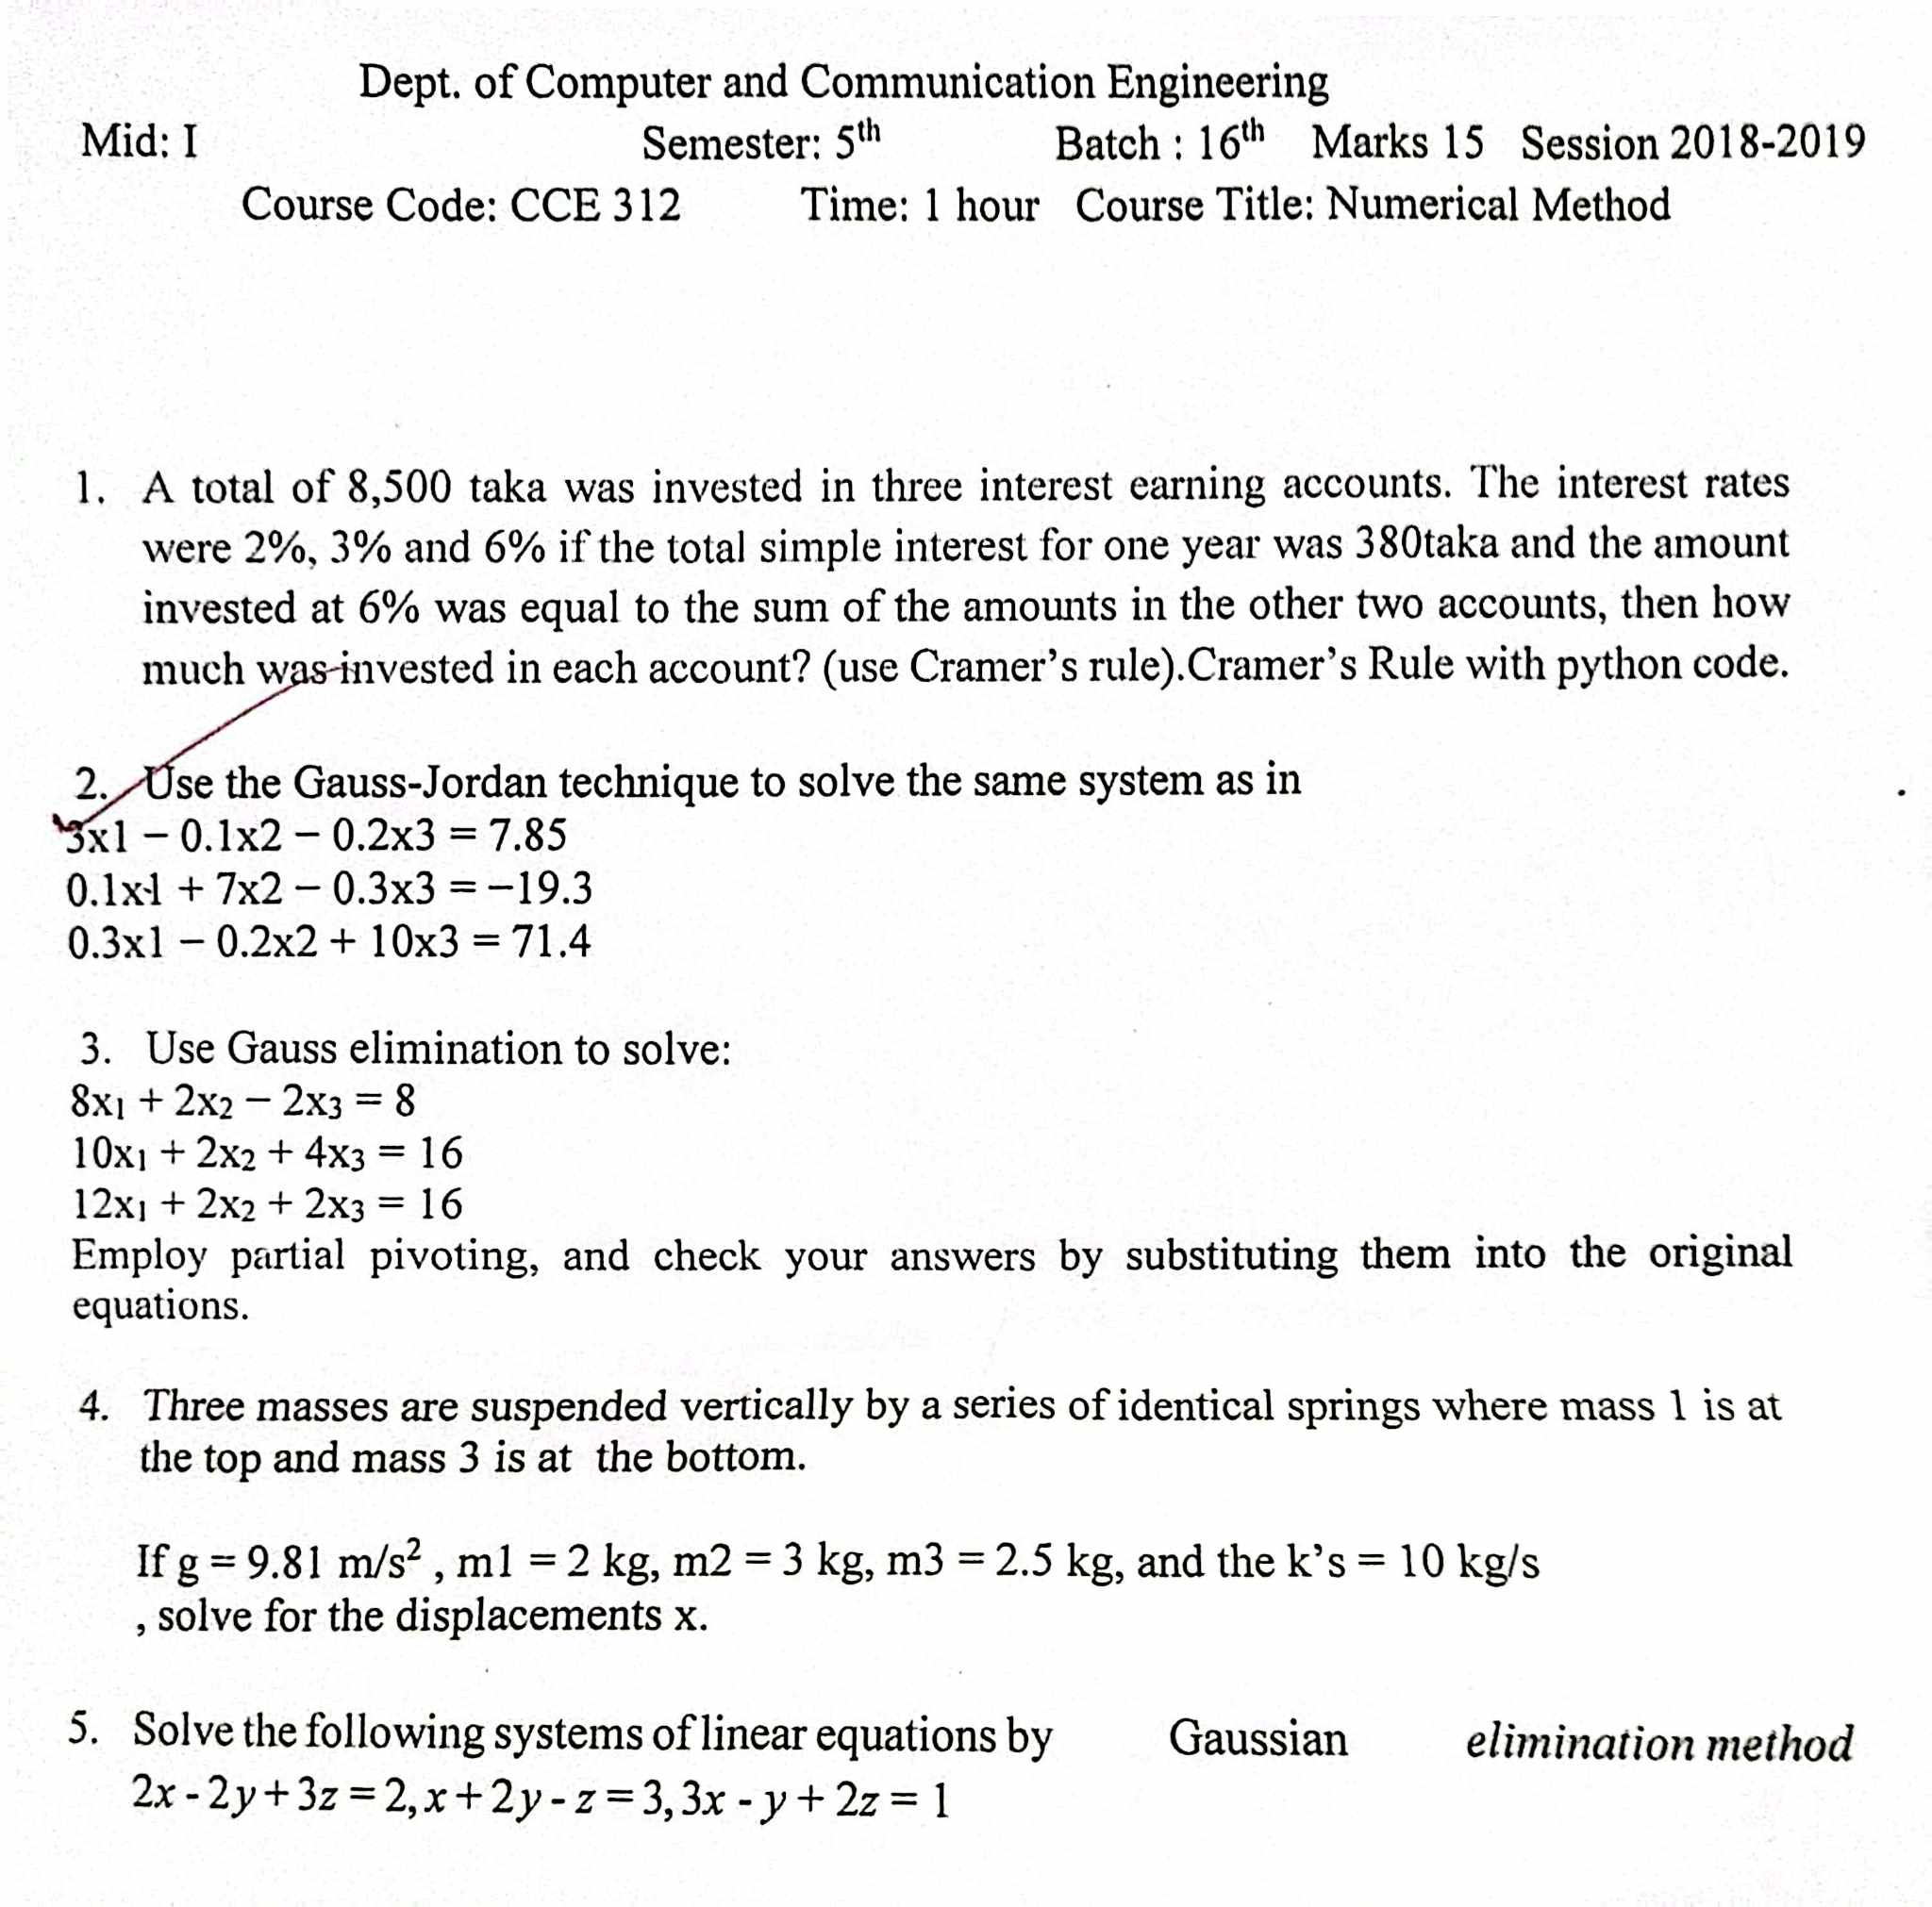